In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches


In [32]:
def create_vertical_arrow(ax,
                          arrow_x, 
                          arrowhead_width, # not used
                          arrowhead_tip_y, 
                          arrowhead_tip_height, 
                          end_shaft, 
                          colour_tip = 'black',
                          colour_shaft = colour_tip,
                          annotation = None): 
    verts = np.array([[-0.5, 1.0], [0.5, 1.0], [0.0, 0.0], [-0.5, 1.0]])   # define a 1-by-1 tip of the arrow
    verts *= arrowhead_tip_height                                          # scale it
    if (end_shaft < arrowhead_tip_y):                                      # if the end of the tip is above 
        verts[:, 1] *= -1                                                  # the end of the shaft, flip it upside down

    verts[:, 0] += arrow_x                                                 # change X coords to move along OX axis
    verts[:, 1] += arrowhead_tip_y                                         # change Y coords to move along OY axis

    path = mpath.Path(verts)                                               # create the outline
    patch = mpatches.PathPatch(path, fc=colour_tip, ec=colour_tip)         # fill in the outline
    ax.add_patch(patch)                                                    # add the arrow tip to the figure

    x = np.array([arrow_x, arrow_x])                      # define where the arrow line should go - X coordinates
    y = np.array([arrowhead_tip_y, end_shaft])            # define where the arrow line should go - Y coordinates
    ax.plot(x, y, color=colour_shaft)                     # add the arrow shaft to the figure

    ax.annotate(annotation, (arrow_x, end_shaft))         # add X label to the right place
    

In [28]:
def create_ruler(min_x, max_x, x_arrow, nb_steps, big_bar_frequency, create_arrow_func = create_vertical_arrow):
    y_lim_small = 0.1
    y_lim_big = 0.2
    
    plt.close()
    fig, ax = plt.subplots()                     # create the blank figure
    
    ax.plot([min_x, max_x], [0, 0])              # add a horizontal line to the plot
    
    size_step = (max_x - min_x) / nb_steps       # define the distance between vertical bars
    for i in range(nb_steps + 1):                # (nb_steps + 1) several vertical bars
        y_lim = y_lim_small                      # this is the default size of the vertical bar
        if (i % big_bar_frequency == 0):         # these bars will be longer
            y_lim = y_lim_big     
        x = min_x + i * size_step                # define where we put this vertical bar
        y_bar = np.array([-y_lim, y_lim])        # define the vertical bar - Y coords
        x_bar = np.array([x, x])                 # define the vertical bar - X coords
        ax.plot(x_bar, y_bar)                    # add the vertical bar to the plot
        if (i == 0) or (i == nb_steps):          # add annotation for the first and the last bar
            annotation_label = str(x) + " cm"          # this is what the label will look like
            ax.annotate(annotation_label, (x, -y_lim)) # add the label to the right place
    
    create_arrow_func(    ax = ax,
                          arrow_x = x_arrow, 
                          arrowhead_width = None,
                          arrowhead_tip_y = 1.5 * y_lim_small, 
                          arrowhead_tip_height = 0.8 * y_lim_small, 
                          end_shaft = 3.5 * y_lim_small, 
                          colour_tip = 'gray',
                          colour_shaft = 'black',
                          annotation = 'X')
    
    ax.relim()                                   # change the scale
    ax.autoscale_view()
    ax.axis("off")                               # don't show the axis
    plt.show()

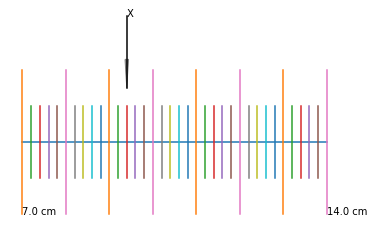

In [29]:
create_ruler(min_x = 7, max_x = 14, x_arrow = 9.4, nb_steps = 35, big_bar_frequency = 5)

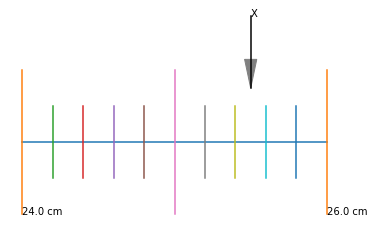

In [30]:
create_ruler(min_x = 24.0, max_x = 26.0, x_arrow = 25.5, nb_steps = 10, big_bar_frequency = 5)

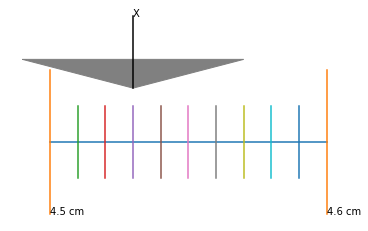

In [31]:
create_ruler(min_x = 4.5, max_x = 4.6, x_arrow = 4.53, nb_steps = 10, big_bar_frequency = 10)

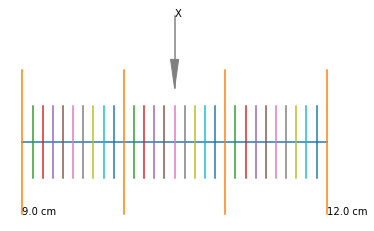

In [13]:
create_ruler(min_x = 9, max_x = 12, x_arrow = 10.5, nb_steps = 30, big_bar_frequency = 10)

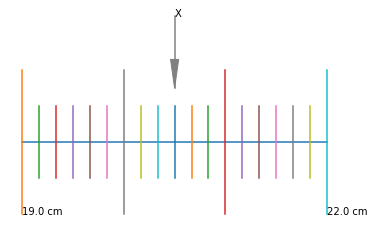

In [16]:
create_ruler(min_x = 19, max_x = 22, x_arrow = 20.5, nb_steps = 18, big_bar_frequency = 6)

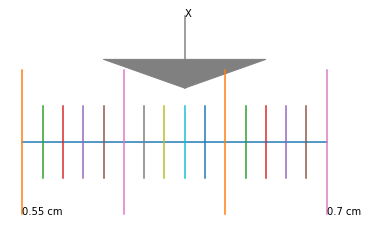

In [15]:
create_ruler(min_x = 0.55, max_x = 0.70, x_arrow = 0.63, nb_steps = 15, big_bar_frequency = 5)

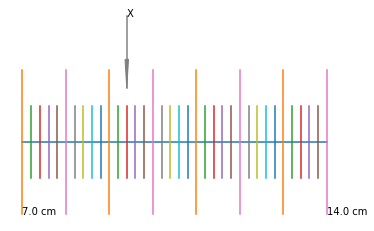

In [14]:
create_ruler(min_x = 7, max_x = 14, x_arrow = 9.4, nb_steps = 35, big_bar_frequency = 5)

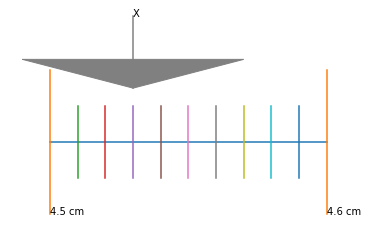

In [7]:
# IMPLEMENTATION WITH LOOPS

min_x = 4.5
max_x = 4.6
x_arrow = 4.53

nb_steps = 10
big_bar_frequency = 10

y_lim_small = 0.1
y_lim_big = 0.2
bottom_arrow = 1.5 * y_lim_small
top_arrow = 3.5 * y_lim_small

plt.close()
fig, ax = plt.subplots()                     # create the blank figure

ax.plot([min_x, max_x], [0, 0])              # add a horizontal line to the plot

size_step = (max_x - min_x) / nb_steps       # define the distance between vertical bars
for i in range(nb_steps + 1):                # (nb_steps + 1) several vertical bars
    y_lim = y_lim_small                      # this is the default size of the vertical bar
    if (i % big_bar_frequency == 0):         # these bars will be longer
        y_lim = y_lim_big     
    x = min_x + i * size_step                # define where we put this vertical bar
    y_bar = np.array([-y_lim, y_lim])        # define the vertical bar - Y coords
    x_bar = np.array([x, x])                 # define the vertical bar - X coords
    ax.plot(x_bar, y_bar)                    # add the vertical bar to the plot
    if (i == 0) or (i == nb_steps):          # add annotation for the first and the last bar
        annotation_label = str(x) + " cm"          # this is what the label will look like
        ax.annotate(annotation_label, (x, -y_lim)) # add the label to the right place

x = np.array([x_arrow, x_arrow])             # define where the arrow line should go - X coordinates
y = np.array([bottom_arrow, top_arrow])      # define where the arrow line should go - Y coordinates
ax.plot(x, y, color="gray" )                 # plot the arrow line
ax.annotate("X", (x_arrow, top_arrow))       # add X label to the right place

verts = np.array([[-1.0, 2.0], [1.0, 2.0], [0.0, 0.0], [-1.0, 2.0]])   # define a big tip of the arrow
verts *= y_lim_small * 0.4                             # make it smaller
verts[:, 0] += x_arrow                                 # move along OX axis
verts[:, 1] += bottom_arrow                            # move along OY axis
path = mpath.Path(verts)                               # make it look like an arrow
patch = mpatches.PathPatch(path, fc='gray', ec="gray")
ax.add_patch(patch)

ax.relim()                                   # change the scale
ax.autoscale_view()
ax.axis("off")                               # don't show the axis
plt.show()

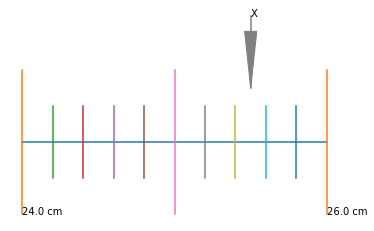

In [6]:
#NAIVE IMPLEMENTATION

plt.close()
fig, ax = plt.subplots()             # create the blank figure

ax.plot([24.0, 26.0], [0, 0])        # add a horizontal line to the plot

# define where we put this vertical bar
y_bar = np.array([-0.2, 0.2])        # scale the vertical bar
x_bar = np.array([24.0, 24.0])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
ax.annotate("24.0 cm", (24.0, -0.2)) # add the label to the right place
y_bar = np.array([-0.1, 0.1])        # scale the vertical bar
x_bar = np.array([24.2, 24.2])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.1, 0.1])        # scale the vertical bar
x_bar = np.array([24.4, 24.4])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.1, 0.1])        # scale the vertical bar
x_bar = np.array([24.6, 24.6])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.1, 0.1])        # scale the vertical bar
x_bar = np.array([24.8, 24.8])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.2, 0.2])        # scale the vertical bar
x_bar = np.array([25.0, 25.0])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.1, 0.1])        # scale the vertical bar
x_bar = np.array([25.2, 25.2])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.1, 0.1])        # scale the vertical bar
x_bar = np.array([25.4, 25.4])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.1, 0.1])        # scale the vertical bar
x_bar = np.array([25.6, 25.6])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.1, 0.1])        # scale the vertical bar
x_bar = np.array([25.8, 25.8])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
y_bar = np.array([-0.2, 0.2])        # scale the vertical bar
x_bar = np.array([26.0, 26.0])       # define the bar
ax.plot(x_bar, y_bar)                # add the vertical bar to the plot
ax.annotate("26.0 cm", (26.0, -0.2)) # add the label to the right place

x = np.array([25.5, 25.5])             # define where the arrow line should go - X coordinates
y = np.array([0.15, 0.35])      # define where the arrow line should go - Y coordinates
ax.plot(x, y, color="gray" )                 # plot the arrow line
ax.annotate("X", (25.5, 0.35))       # add X label to the right place

verts = np.array([[25.46, 0.308], [25.54, 0.308], [25.5, 0.15], [25.46, 0.308]])   # define a big tip of the arrow
path = mpath.Path(verts)                               # make it look like an arrow
patch = mpatches.PathPatch(path, fc='gray', ec="gray")
ax.add_patch(patch)

ax.relim()                                   # change the scale
ax.autoscale_view()
ax.axis("off")                               # don't show the axis
plt.show()